<a href="https://colab.research.google.com/github/idalina-emilly/V-rus-da-dengue-/blob/main/c%C3%B3digo_antiviral_versaoidoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import time
time.time()

1739821851.5805902

In [ ]:
wks_s = np.array([1.0, 1.96, 2.425, 3.63])           #% da população de monócitos ao longo da gravidez em relação a não grávida
wks_z = np.array([1.0, 0.81, 0.64, 0.57])            #% da população de linfócitos ao longo da gravidez em relação a não grávida
wks_IFN = np.array([1.0, 0.5963, 0.5611, 1.0704])    #% da produção de linfócitos-T com o mesmo estímulo
a = np.array([0.001, 0.002, 0.003])                  #taxa de invasão bem-sucedida em um monócito susceptível
wks_mu = 80 * wks_s                                  #monócitos produzidos/dia.uL
wks_eta = 0.265 * wks_z                              #linfo-T produzidos/dia.uL para equilíbrio de 2000 linfo-T na ausência de infecção
alpha = 1/3                                          #1/período de vida de um monócito em dias
beta = 1/0.5                                         #1/período de infecção de um monócito
gamma = 0.8                                          #taxa de liberação de vírus
k = 20                                               #taxa de multiplicação de vírus
nu = 0.001                                           #taxa de eliminação de monócito infectado
delta = 1/365                                        #1/período de vida de linfo-T
wks_c = 0.01 * wks_IFN                               #estímulo de produção de linfócitos-T pela densidade de monócitos infectados
wks_d = 0.03 * wks_IFN                               #estímulo de produção de linfócitos-T pelos contatos com monócitos infectados
wks_beta1 = beta + wks_eta * nu / delta
wks_c1 = wks_c + wks_d * wks_eta / delta

h = 0.01                                             #parâmetro de precisão para método numérico de Runge-Kutta
h1 = h/2                                             #parâmetro intermediário de precisão para método numérico de Runge-Kutta
t = np.arange(0, 10+h, h)                            #vetor de tempo, até 10 dias
time = len(t)
pregnancy = len(wks_s)
kutta = 4

In [ ]:

dados_4 = np.zeros((pregnancy+9,time,kutta))s = np.zeros((pregnancy,time,kutta))
v = np.zeros((pregnancy,time,kutta))
i = np.zeros((pregnancy,time,kutta))
z = np.zeros((pregnancy,time,kutta))

ds = np.zeros((pregnancy,time - 1,kutta))
dv = np.zeros((pregnancy,time - 1,kutta))
di = np.zeros((pregnancy,time - 1,kutta))
dz = np.zeros((pregnancy,time - 1,kutta))

incremento_s = np.zeros((pregnancy,time))
incremento_i = np.zeros((pregnancy,time))
incremento_v = np.zeros((pregnancy,time))
incremento_z = np.zeros((pregnancy,time))

###############################

s_1 = np.zeros((pregnancy,time,kutta))
v_1 = np.zeros((pregnancy,time,kutta))
i_1 = np.zeros((pregnancy,time,kutta))
z_1 = np.zeros((pregnancy,time,kutta))

ds_1 = np.zeros((pregnancy,time - 1,kutta))
dv_1 = np.zeros((pregnancy,time - 1,kutta))
di_1 = np.zeros((pregnancy,time - 1,kutta))
dz_1 = np.zeros((pregnancy,time - 1,kutta))

incremento_s_1 = np.zeros((pregnancy,time))
incremento_i_1 = np.zeros((pregnancy,time))
incremento_v_1 = np.zeros((pregnancy,time))
incremento_z_1 = np.zeros((pregnancy,time))

dados_2 = np.zeros((pregnancy+9,time,kutta))
dados_3 = np.zeros((pregnancy+9,time,kutta))
dados_5 = np.zeros((pregnancy+9,time,kutta))

s[:,0,0] = 250 * wks_s
i[:,0,0] = 10
v[:,0,0] = 165
z[:,0,0] = 2000 * wks_z

s_1[:,0,0] = 250 * wks_s
i_1[:,0,0] = 10
v_1[:,0,0] = 165
z_1[:,0,0] = 2000 * wks_z

dados_x = np.zeros((pregnancy+55,time,kutta))

day = 3#1/1.33/2/3/4/5

In [ ]:
def graph_generator_3(eixo_x,eixo_y,t,dados,dados2,nome):
    fig, ax = plt.subplots(facecolor='#C0C0C0')
    ax.set_facecolor("#FFFFFF")
    plt.subplots_adjust(right=0.97, top=0.97)
    plt.xlabel(eixo_x, fontsize = 12, labelpad = 4)
    plt.ylabel(eixo_y,  fontsize = 12, labelpad = 6)
    plt.plot(t,dados[0,:,0],'#00c2b0',label = 'Com antiviral',linewidth = '1.9')
    plt.plot(t,dados2[0,:,0],'#ff8201',label = 'Sem antiviral',linewidth = '1.9')
    plt.axvline(day, color = 'b', linestyle = '--', linewidth = 1.3,label = 'Administração do antiviral')
    leg = ax.legend()
    plt.grid(color = 'gray', linestyle = '-', linewidth = 0.15)
    name = nome + '[' + str(day) + '].png'
    plt.savefig(name,format='png')
    return 0

In [ ]:
for w in range(1):
    for n in range(time - 1):
        if(n <= day*100):#100/133/200/300/400/500
            remedio = 1
        else:
            remedio = 0
        for r in range(kutta):

            ds[w,n,r] = wks_mu[w] - alpha * s[w,n,r] - a[2] * s[w,n,r] * v[w,n,r]
            di[w,n,r] = a[2] * s[w,n,r] * v[w,n,r] - beta * i[w,n,r] - nu * i[w,n,r] * z[w,n,r]
            dv[w,n,r] = remedio * k * i[w,n,r] - gamma * v[w,n,r] - a[2] * s[w,n,r] * v[w,n,r]
            dz[w,n,r] = wks_eta[w] + wks_c[w] * i[w,n,r] + wks_d[w] * i[w,n,r] * z[w,n,r] - delta * z[w,n,r]

            ds_1[w,n,r] = wks_mu[w] - alpha * s_1[w,n,r] - a[2] * s_1[w,n,r] * v_1[w,n,r]
            di_1[w,n,r] = a[2] * s_1[w,n,r] * v_1[w,n,r] - beta * i_1[w,n,r] - nu * i_1[w,n,r] * z_1[w,n,r]
            dv_1[w,n,r] = k * i_1[w,n,r] - gamma * v_1[w,n,r] - a[2] * s_1[w,n,r] * v_1[w,n,r]
            dz_1[w,n,r] = wks_eta[w] + wks_c[w] * i_1[w,n,r] + wks_d[w] * i_1[w,n,r] * z_1[w,n,r] - delta * z_1[w,n,r]

            if r < (kutta - 1):
                s[w,n,r+1] = s[w,n,r] + h1 * ds[w,n,r]
                i[w,n,r+1] = i[w,n,r] + h1 * di[w,n,r]
                v[w,n,r+1] = v[w,n,r] + h1 * dv[w,n,r]
                z[w,n,r+1] = z[w,n,r] + h1 * dz[w,n,r]

                s_1[w,n,r+1] = s_1[w,n,r] + h1 * ds_1[w,n,r]
                i_1[w,n,r+1] = i_1[w,n,r] + h1 * di_1[w,n,r]
                v_1[w,n,r+1] = v_1[w,n,r] + h1 * dv_1[w,n,r]
                z_1[w,n,r+1] = z_1[w,n,r] + h1 * dz_1[w,n,r]

        incremento_s[w,n] = (h/6) * (ds[w,n,0] + 2 * ds[w,n,1] + 2 * ds[w,n,2] + ds[w,n,3])
        incremento_i[w,n] = (h/6) * (di[w,n,0] + 2 * di[w,n,1] + 2 * di[w,n,2] + di[w,n,3])
        incremento_v[w,n] = (h/6) * (dv[w,n,0] + 2 * dv[w,n,1] + 2 * dv[w,n,2] + dv[w,n,3])
        incremento_z[w,n] = (h/6) * (dz[w,n,0] + 2 * dz[w,n,1] + 2 * dz[w,n,2] + dz[w,n,3])

        incremento_s_1[w,n] = (h/6) * (ds_1[w,n,0] + 2 * ds_1[w,n,1] + 2 * ds_1[w,n,2] + ds_1[w,n,3])
        incremento_i_1[w,n] = (h/6) * (di_1[w,n,0] + 2 * di_1[w,n,1] + 2 * di_1[w,n,2] + di_1[w,n,3])
        incremento_v_1[w,n] = (h/6) * (dv_1[w,n,0] + 2 * dv_1[w,n,1] + 2 * dv_1[w,n,2] + dv_1[w,n,3])
        incremento_z_1[w,n] = (h/6) * (dz_1[w,n,0] + 2 * dz_1[w,n,1] + 2 * dz_1[w,n,2] + dz_1[w,n,3])

        s[w,n+1,0] = s[w,n,0] + incremento_s[w,n]
        i[w,n+1,0] = i[w,n,0] + incremento_i[w,n]
        v[w,n+1,0] = v[w,n,0] + incremento_v[w,n]
        z[w,n+1,0] = z[w,n,0] + incremento_z[w,n]

        s_1[w,n+1,0] = s_1[w,n,0] + incremento_s_1[w,n]
        i_1[w,n+1,0] = i_1[w,n,0] + incremento_i_1[w,n]
        v_1[w,n+1,0] = v_1[w,n,0] + incremento_v_1[w,n]
        z_1[w,n+1,0] = z_1[w,n,0] + incremento_z_1[w,n]

0

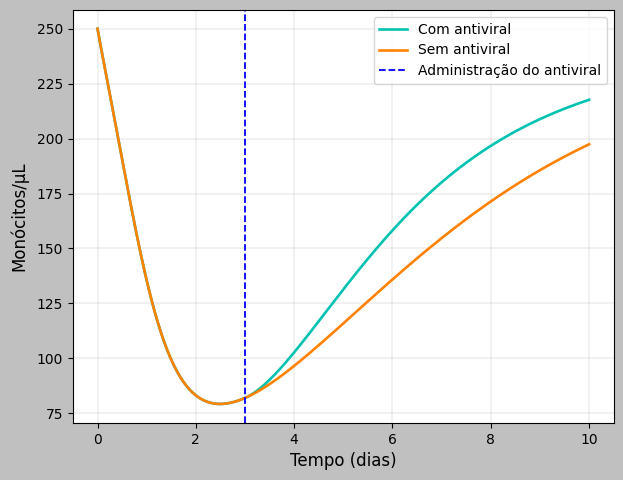

In [ ]:
graph_generator_3('Tempo (dias)',u'Monócitos/\u03bcL',t,s,s_1,'Susceptible_monocyte_population')

0

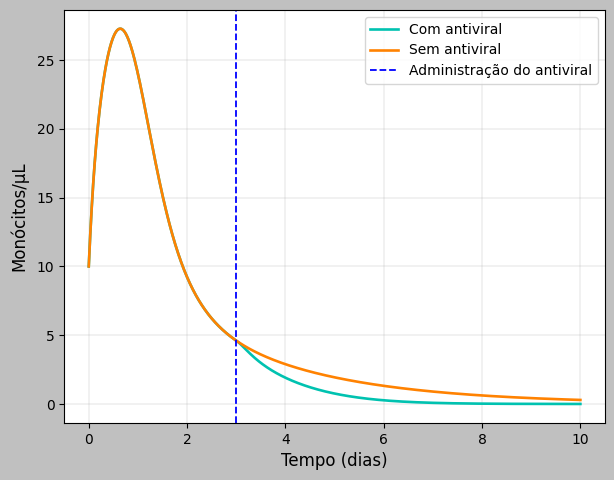

In [ ]:
graph_generator_3('Tempo (dias)',u'Monócitos/\u03bcL',t,i,i_1,'Population_of_infected_monocytes')

0

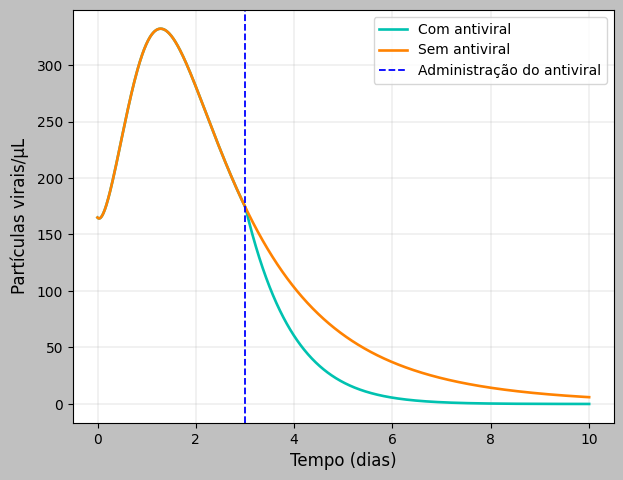

In [ ]:
graph_generator_3('Tempo (dias)',u'Partículas virais/\u03bcL',t,v,v_1,'Zika_virus_population')

0

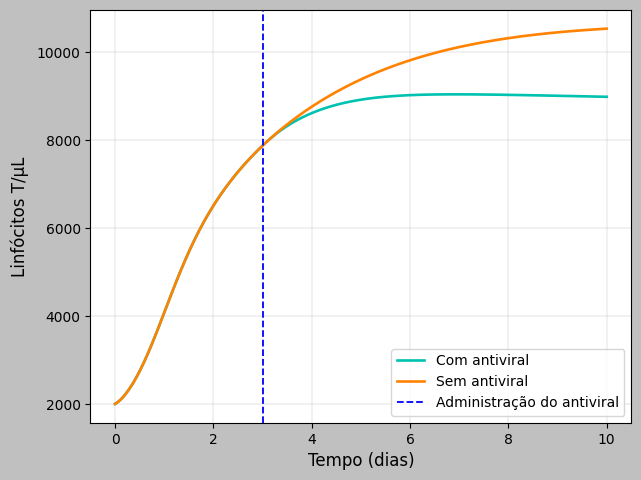

In [ ]:
graph_generator_3('Tempo (dias)',u'Linfócitos T/\u03bcL',t,z,z_1,'T-lymphocyte_population')